In [363]:
import numpy as np
from simulator import NBodySimulator
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [364]:
def plot_3d(n, r):
    fig=plt.figure(figsize=(15,15))
    ax=fig.add_subplot(111,projection="3d")
    
    for i in range(n):
        r_plot = r[:,i*3:i*3+3]
        ax.plot(r_plot[:,0],r_plot[:,1],r_plot[:,2])
        label = f'body {i+1}'
        ax.scatter(r_plot[-1,0],r_plot[-1,1],r_plot[-1,2],marker="o",s=100, label=label)

    ax.set_xlabel("x-coordinate",fontsize=14)
    ax.set_ylabel("y-coordinate",fontsize=14)
    ax.set_zlabel("z-coordinate",fontsize=14)
    ax.set_title("Visualization of orbits of stars in a two-body system\n",fontsize=14)
    ax.legend(loc="upper left",fontsize=14)

In [365]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [366]:
K2

7.239323869320315

In [367]:
sim2 = NBodySimulator(n=2, G=K1)

In [368]:
m = np.array([1.1, .907])
r = np.array([[-0.5, 0, 0],[0.5, 0, 0]])
v = np.array([[0.01, 0.01, 0],[-0.05, 0, -0.1]])

In [369]:
sim2.fit(r, v, m)

In [370]:
t = np.linspace(0, 8, 5000)

In [371]:
sim2.simulate(t)

In [372]:
print(sim2.sol.shape, sim2.r_sol.shape, sim2.r_sol_com.shape)

(5000, 12) (5000, 6) (5000, 6)


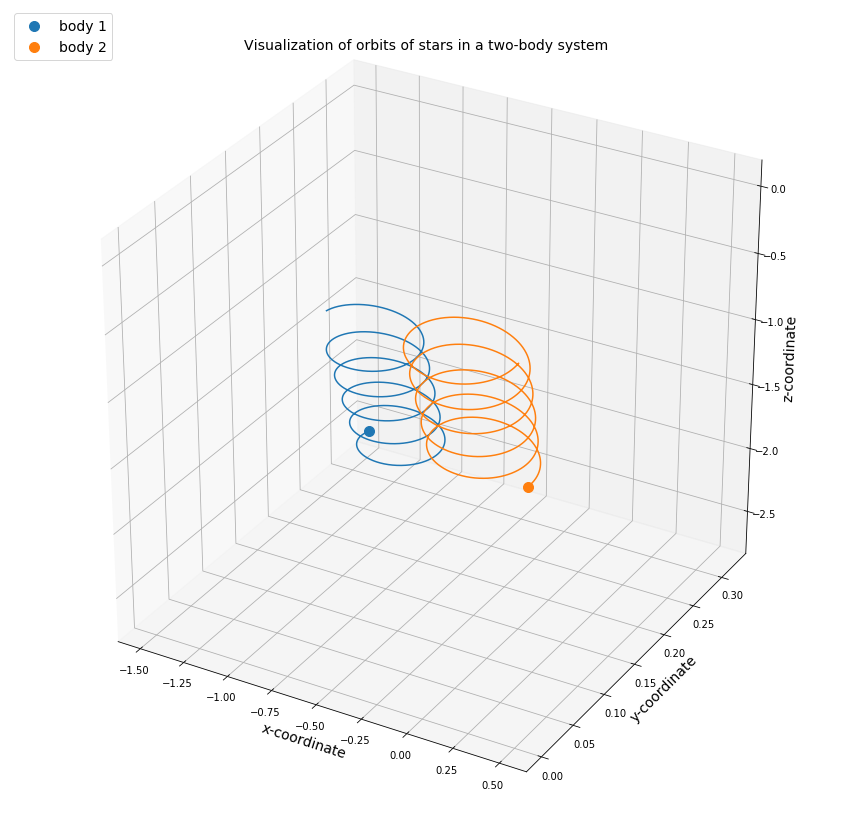

In [373]:
plot_3d(sim2.n, sim2.r_sol)

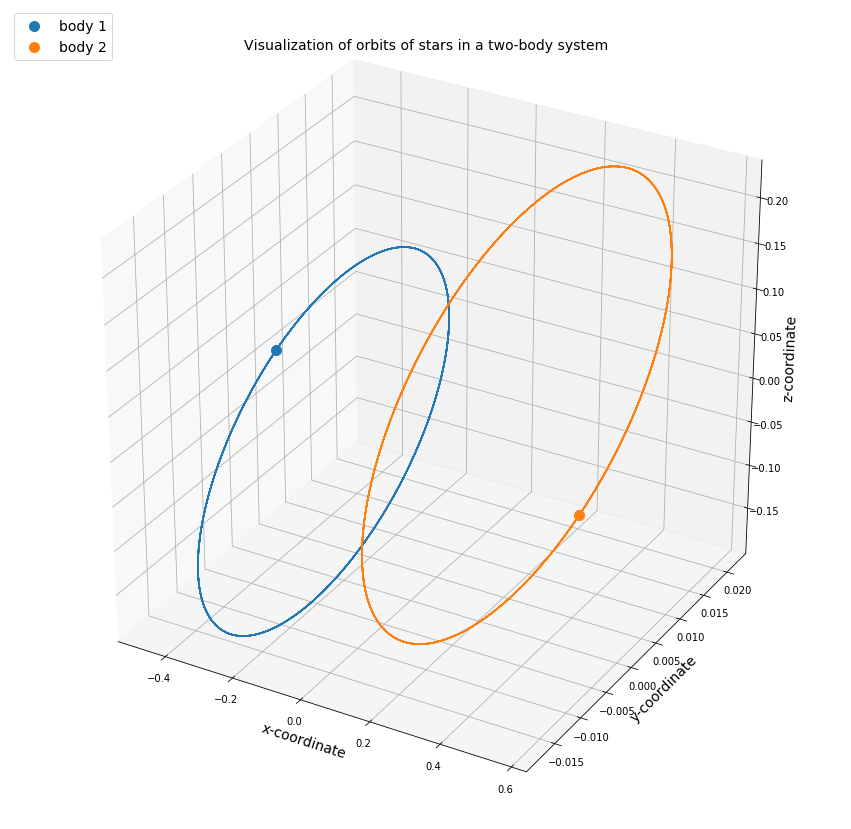

In [374]:
plot_3d(sim2.n, sim2.r_sol_com)

In [375]:
sim3 = NBodySimulator(n=3, G=K1)

In [376]:
m = np.array([1.1, .907, 1])
r = np.array([[-0.5, 0, 0],[0.5, 0, 0], [0, 1, 0]])
v = np.array([[0.01, 0.01, 0],[-0.05, 0, -0.1], [0, -0.01, 0]])

(500, 18) (500, 9) (500, 9)


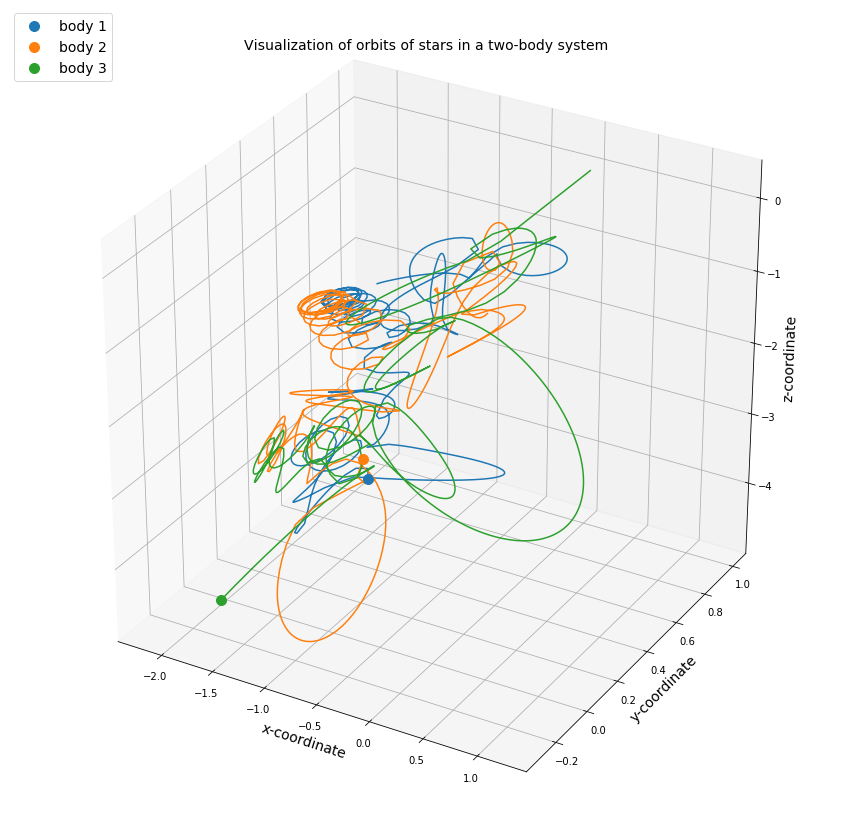

In [377]:
sim3.fit(r, v, m)
t = np.linspace(0, 20, 500)
sim3.simulate(t)
print(sim3.sol.shape, sim3.r_sol.shape, sim3.r_sol_com.shape)
plot_3d(sim3.n, sim3.r_sol)

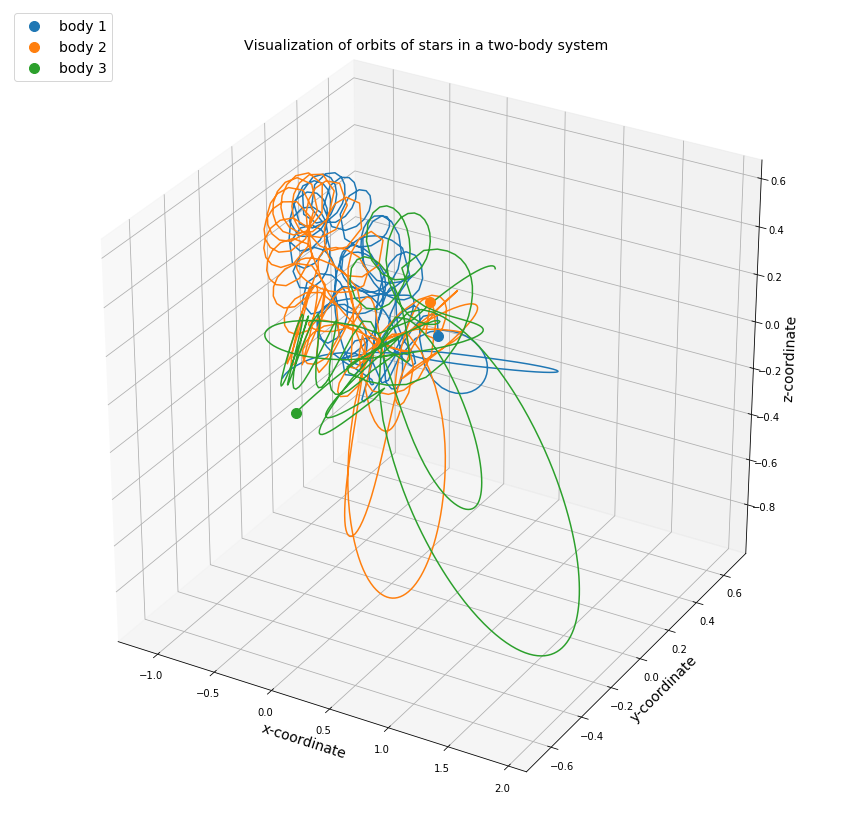

In [378]:
plot_3d(sim3.n, sim3.r_sol_com)